In [1]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Data for Clustering
X =pd.DataFrame([[5.9,3.2],[4.6,2.9],[6.2,2.8],[4.7,3.2],[5.5,4.2],[5.0,3.0],[4.9,3.1],[5.1,3.8],[6.0,3.0]])

In [3]:
#Mean Calculation
m1 = [6.2,3.2]
m2 = [6.6,3.7]
m3 = [6.5,3.0]
X['cluster'] = 0

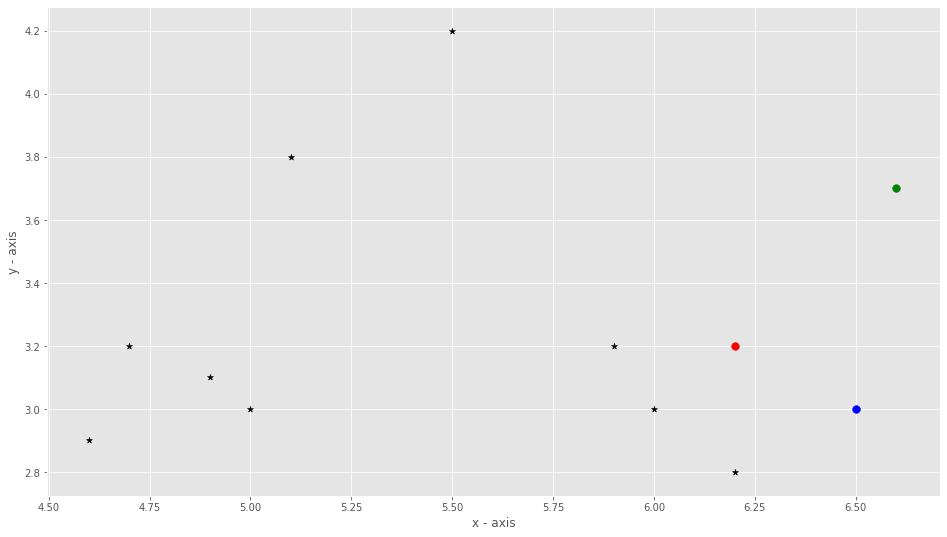

In [4]:
#Plot before K-Means
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
plt.scatter(X[0], X[1], label= "stars",marker="*",color= "black", s=40) 
plt.scatter(6.2, 3.2, c='red',s=60)
plt.scatter(6.6,3.7,c='green',s=60)
plt.scatter(6.5, 3.0, c='blue',s=60)
plt.xlabel('x - axis') 
plt.ylabel('y - axis')  
plt.show()

In [5]:
#K-Means Clustering
Y = str(list(X['cluster']))
i = 0
while(True):
    X['dis_from_m1'] =  np.sqrt((X.loc[:,0]-m1[0])**2 + (X.loc[:,1]-m1[1])**2) 
    X['dis_from_m2'] =  np.sqrt((X.loc[:,0]-m2[0])**2 + (X.loc[:,1]-m2[1])**2) 
    X['dis_from_m3'] =  np.sqrt((X.loc[:,0]-m3[0])**2 + (X.loc[:,1]-m3[1])**2) 
    X['min_dis'] = np.amin(X.loc[:,['dis_from_m1','dis_from_m2','dis_from_m3']], axis=1) 
    label1_after = X['min_dis'] == X['dis_from_m1']
    label2_after = X['min_dis'] == X['dis_from_m2']
    label3_after = X['min_dis'] == X['dis_from_m3']
    X.at[label2_after,'cluster'] = 2
    X.at[label3_after,'cluster'] = 3
    X.at[label1_after,'cluster'] = 1     
    m1 = np.mean(X.loc[X['cluster']==1,[0,1]],axis=0)
    m2 = np.mean(X.loc[X['cluster']==2,[0,1]],axis=0)
    m3 = np.mean(X.loc[X['cluster']==3,[0,1]],axis=0)
    l = str(list(X['cluster']))
    if l == Y:
        break    
    Y = str(list(X['cluster'])) 
    i = i+1
print(X)

     0    1  cluster  dis_from_m1  dis_from_m2  dis_from_m3   min_dis
0  5.9  3.2        3     1.110180     1.000000     0.240370  0.240370
1  4.6  2.9        1     0.250000     1.303840     1.436817  0.250000
2  6.2  2.8        3     1.422146     1.500000     0.260342  0.260342
3  4.7  3.2        1     0.180278     1.000000     1.348250  0.180278
4  5.5  4.2        2     1.346291     0.282843     1.313181  0.282843
5  5.0  3.0        1     0.206155     1.044031     1.033333  0.206155
6  4.9  3.1        1     0.111803     0.984886     1.137737  0.111803
7  5.1  3.8        2     0.807775     0.282843     1.229273  0.282843
8  6.0  3.0        3     1.201041     1.220656     0.033333  0.033333


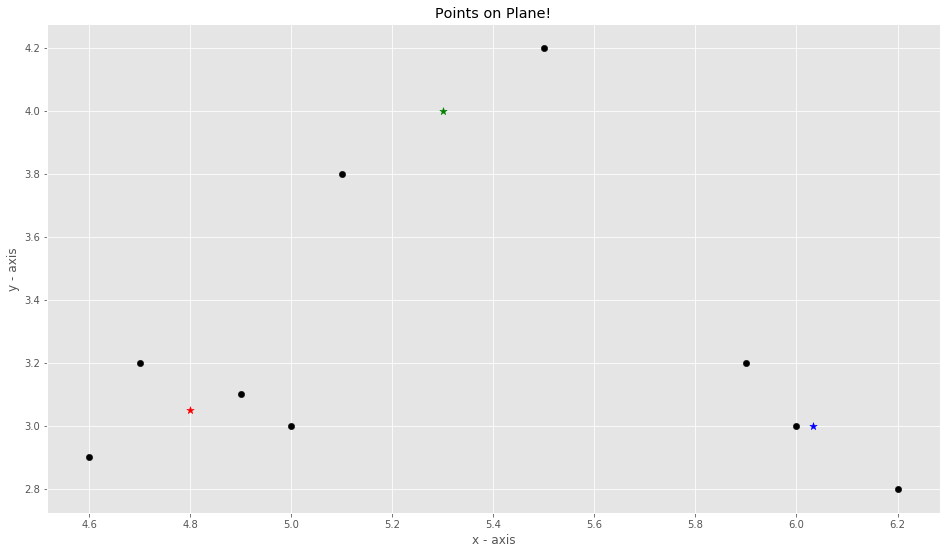

In [12]:
#Plots after K-Means Clustering
plt.scatter(X[0], X[1], label= "stars",color= "black", s=40) 
plt.scatter(m1[0], m1[1], c='red',s=60,marker="*")
plt.scatter(m2[0],m2[1],c='green',s=60,marker="*")
plt.scatter(m3[0], m3[1], c='blue',s=60,marker="*")
plt.xlabel('x - axis') 
plt.ylabel('y - axis') 
plt.title('Points on Plane!') 
plt.show()